In [1]:
from deepface import DeepFace
from deepface.detectors import FaceDetector
import cv2
from matplotlib import pyplot as plt
import random as rd
import os
import time
import face_recognition as fc
from mtcnn import MTCNN

In [2]:
img_path1 = 'images/190311.jpg'
img_path2 = 'images/i.jpg'
img_path3 = 'images/kyzdar.jpg'

1/1 [==============================] - 0s 222ms/step
[{'box': [665, 50, 170, 241], 'confidence': 0.9999970197677612, 'keypoints': {'left_eye': (730, 144), 'right_eye': (806, 158), 'nose': (772, 211), 'mouth_left': (721, 233), 'mouth_right': (783, 243)}}, {'box': [831, 63, 188, 248], 'confidence': 0.9999488592147827, 'keypoints': {'left_eye': (865, 167), 'right_eye': (946, 161), 'nose': (887, 215), 'mouth_left': (872, 256), 'mouth_right': (943, 253)}}, {'box': [314, 55, 287, 385], 'confidence': 0.9998238682746887, 'keypoints': {'left_eye': (378, 213), 'right_eye': (506, 215), 'nose': (423, 299), 'mouth_left': (388, 353), 'mouth_right': (504, 359)}}, {'box': [1039, 207, 30, 34], 'confidence': 0.8714310526847839, 'keypoints': {'left_eye': (1054, 224), 'right_eye': (1061, 225), 'nose': (1059, 230), 'mouth_left': (1051, 232), 'mouth_right': (1057, 234)}}]


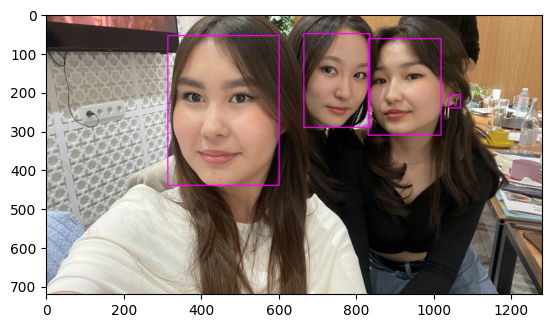

In [3]:
# face_img = fc.load_image_file(img_path3)
# face_img = cv2.cvtColor(face_img, cv2.COLOR_BGR2RGB)

# face_locations = fc.face_locations(face_img)
# print(len(face_locations))

img = cv2.cvtColor(cv2.imread(img_path3), cv2.COLOR_BGR2RGB)
detector = MTCNN()
detections = detector.detect_faces(img)
print(detections)

embeddings = []
for detection in detections:
   x, y, w, h = detection["box"]
   img = cv2.rectangle(img, (int(x), int(y)), (int(x) + int(w), int(y) + int(h)), (255, 0, 255), 2)
   # confidence = detection["confidence"]
   # if confidence > 0.90:
   #    x, y, w, h = detection["box"]
   #    detected_face = img[int(y):int(y+h), int(x):int(x+w)]
      
   #    embedding = DeepFace.represent(detected_face, model_name = 'Facenet', enforce_detection = False)
   #    embeddings.append(embedding)
   
# print(embeddings)
plt.imshow(img)

TypeError: Image data of dtype object cannot be converted to float

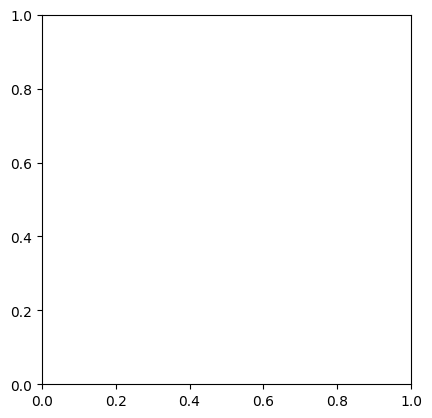

In [14]:
plt.imshow(detections)

In [4]:
try:
  img1 = DeepFace.detectFace(img_path1)
  img2 = DeepFace.detectFace(img_path3)
except:
  raise Exception("Face couldn't detected")

⚠️ Function detectFace is deprecated. Use extract_faces instead.
⚠️ Function detectFace is deprecated. Use extract_faces instead.


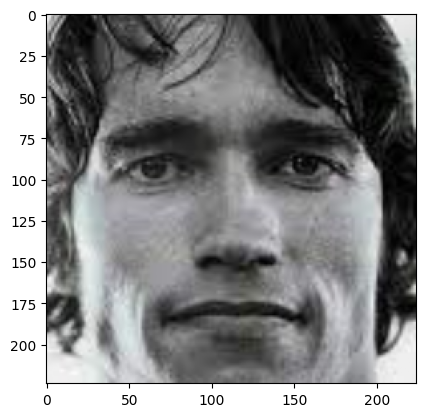

In [5]:
plt.imshow(img1[0]['face'])


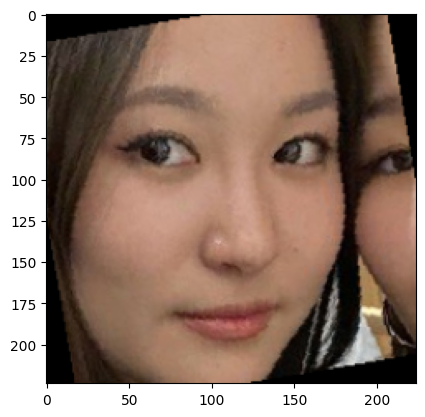

In [6]:
plt.imshow(img2[0]['face'])

In [47]:
res = DeepFace.verify(img1_path=img_path1, img2_path=img_path2, model_name='VGG-Face')

In [48]:
print(res)

{'verified': True, 'distance': 0.26876182509458046, 'threshold': 0.4, 'model': 'VGG-Face', 'detector_backend': 'opencv', 'similarity_metric': 'cosine', 'facial_areas': {'img1': {'x': 901, 'y': 232, 'w': 721, 'h': 721}, 'img2': {'x': 164, 'y': 25, 'w': 177, 'h': 177}}, 'time': 25.68}


In [53]:

# if os.path.exists('representations_vgg_face.pkl') == False:
dfs = DeepFace.find(img_path=img_path1, db_path='images')
# else:
  # os.remove('representations_vgg_face.pkl')

Finding representations:  27%|██▋       | 3/11 [00:04<00:12,  1.62s/it]


ValueError: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.

In [15]:
print(dfs)

[                identity  source_x  source_y  source_w  source_h  \
0      images/190311.jpg       901       232       721       721   
1      images/july21.jpg       901       232       721       721   
2  images/1246774488.jpg       901       232       721       721   

   VGG-Face_cosine  
0     5.551115e-16  
1     1.286684e-01  
2     3.130004e-01  ]
